In [1]:
import pandas as pd
data = pd.read_csv('/content/final_data.csv')
print(data.shape)
print(data.columns)

(4236, 57)
Index(['Unnamed: 0', 'problem', 'level', 'type', 'modified_problem',
       'no_of_equations', 'no_of_variables', 'has_mod', 'has_logarithm',
       'has_fraction', 'has_eq', 'has_neq', 'mod_count', 'log_count',
       'fracs_count', 'eqlts_count', 'neqlts_count', 'max_degree_of_equations',
       'sentence_count', 'word_count', 'words_per_sentence',
       'average_word_length', 'large_words', 'has_repeated_large_words', 'ADJ',
       'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X',
       'sentence_count_cat', 'word_count_cat', 'words_per_sentence_cat',
       'average_word_length_cat', 'large_words_cat', 'number_of_math_vocab',
       'number_of_digits', 'number_of_numbers', 'has_digits', 'has_symbol',
       'symbol_count', 'has_exp', 'no_of_exps', 'has_pow', 'no_of_pow'],
      dtype='object')


In [2]:
data.drop(columns = ['Unnamed: 0', 'problem', 'type', 'modified_problem','has_mod', 'has_logarithm','has_repeated_large_words',
       'has_fraction', 'has_eq', 'has_neq','sentence_count_cat', 'word_count_cat', 'words_per_sentence_cat',
       'average_word_length_cat', 'large_words_cat','has_digits','has_symbol', 'has_exp','has_pow'], inplace = True)

In [9]:
X = data.drop(columns = ['level'])
y = data['level']

##K-Means clustering

In [11]:
X.shape

(4236, 37)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

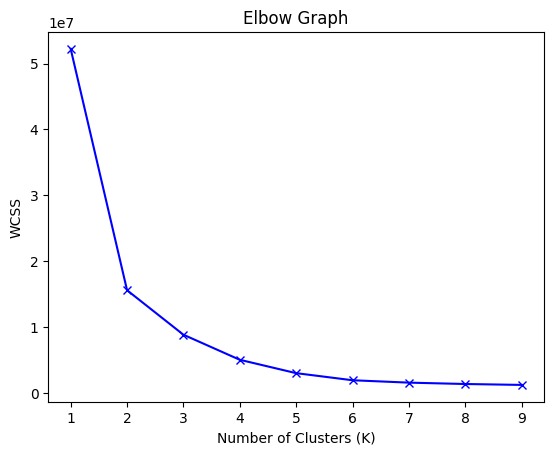

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


k_values = range(1, 10)  # Number of clusters
wcss = []  # Within-cluster sum of squares

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

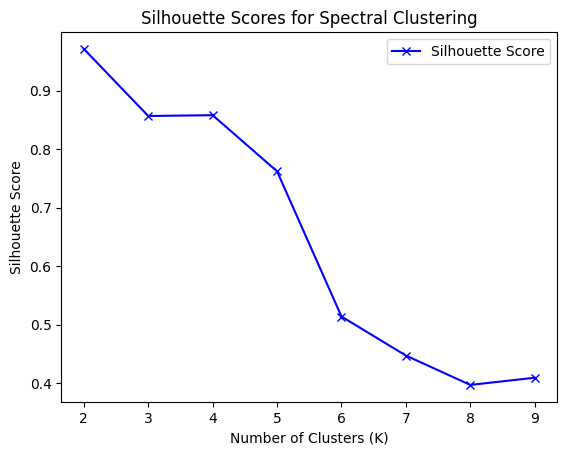

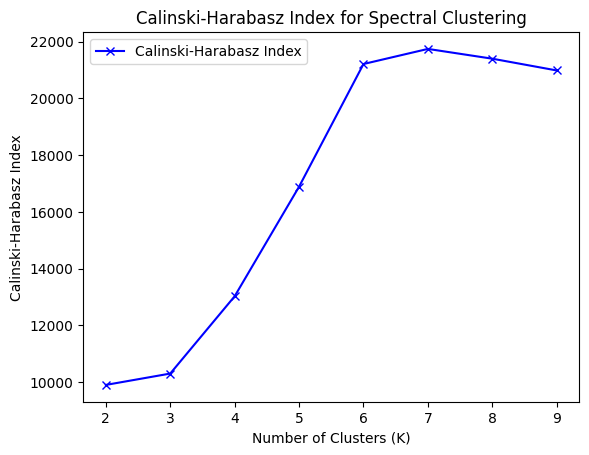

In [17]:
k_values = range(2, 10)
results = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    results.append(labels)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Spectral Clustering')
plt.legend()
plt.show()

# Plot the Calinski-Harabasz index scores
plt.plot(k_values, calinski_scores, 'bx-', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Spectral Clustering')
plt.legend()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(X)
k_means_clusters = kmeans.fit_predict(X)
pd.crosstab(k_means_clusters, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


level,Level 1,Level 2,Level 3,Level 4,Level 5
row_0,,,,,
0,346,818,915,962,1062
1,3,0,3,4,6
2,13,14,25,17,48


##Spectral Clustering

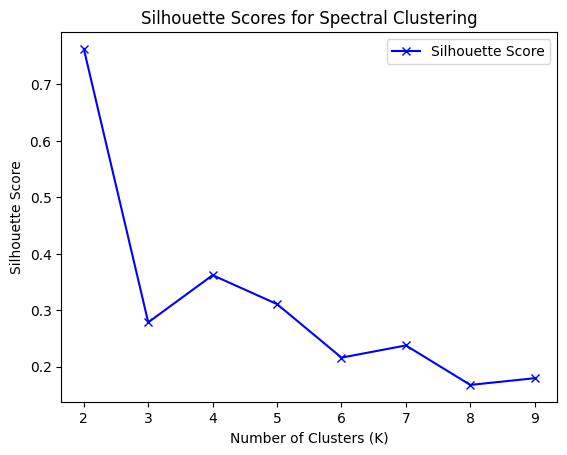

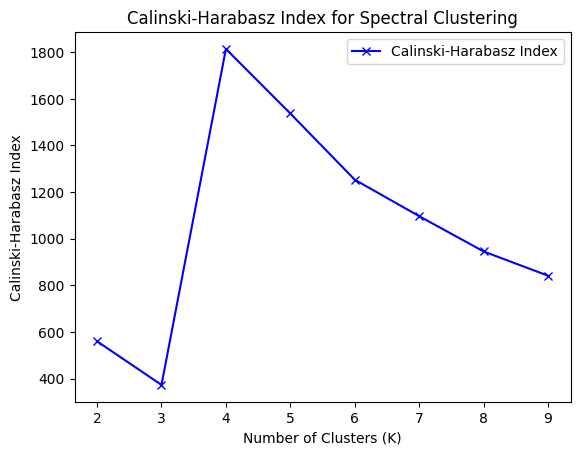

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score, calinski_harabasz_score



k_values = range(2, 10)  # Number of clusters
silhouette_scores = []  # Silhouette scores
calinski_scores = []  # Calinski-Harabasz index scores
results = []
for k in k_values:
    spectral_clustering = SpectralClustering(n_clusters=k, affinity = 'nearest_neighbors')
    labels = spectral_clustering.fit_predict(X)
    results.append(labels)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Spectral Clustering')
plt.legend()
plt.show()

# Plot the Calinski-Harabasz index scores
plt.plot(k_values, calinski_scores, 'bx-', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Spectral Clustering')
plt.legend()
plt.show()


In [21]:
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering object
spectral_clustering = SpectralClustering(
    n_clusters=3,          # Number of clusters to identify
    affinity='nearest_neighbors',   # Affinity matrix computation method (can be 'nearest_neighbors', 'rbf', etc.)
    n_neighbors=10,        # Number of neighbors for the nearest_neighbors affinity option
    assign_labels='kmeans' # Method for assigning labels ('kmeans' or 'discretize')
)

# Fit and predict the clusters
clusters = spectral_clustering.fit_predict(X)

# Access the cluster assignments
print(clusters)

[2 2 0 ... 0 0 2]


In [22]:
pd.crosstab(clusters, y)

level,Level 1,Level 2,Level 3,Level 4,Level 5
row_0,,,,,
0,252,529,608,589,584
1,13,15,28,23,60
2,97,288,307,371,472


ValueError: ignored

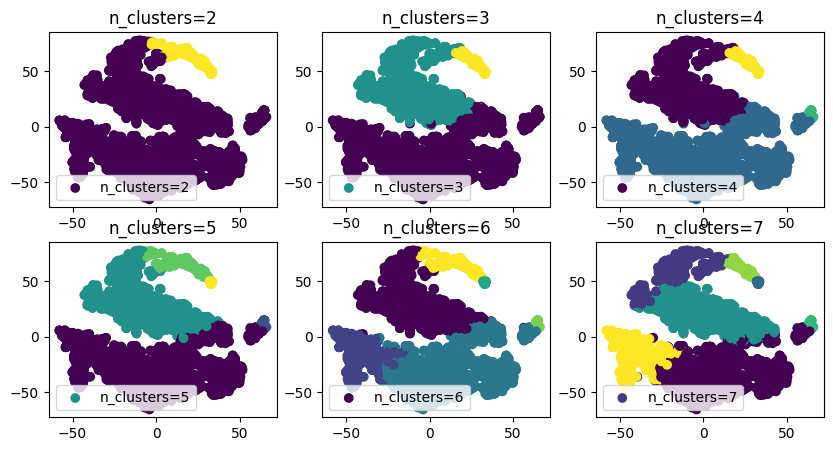

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Visualize t-SNE plot
n_clusters_range = range(2,10)
plt.figure(figsize=(10, 5))
for i, labels in enumerate(results):
    tsne = TSNE(n_components=2, random_state=0)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label=f'n_clusters={n_clusters_range[i]}')
    plt.title(f'n_clusters={n_clusters_range[i]}')
    plt.legend()

plt.tight_layout()
plt.show()